import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# Explore the data
df=pd.read_csv('/content/movie_dataset.csv')
print(df.to_string())

          title        budget     runtime       revenue
0       Movie 0  5.993428e+07  130.990332  1.376958e+08
1       Movie 1  4.723471e+07  123.869505  1.160389e+08
2       Movie 2  6.295377e+07  110.894456  1.424187e+08
3       Movie 3  8.046060e+07  100.295948  1.937179e+08
4       Movie 4  4.531693e+07  120.473350  8.754849e+07
5       Movie 5  4.531726e+07  115.902281  1.161929e+08
6       Movie 6  8.158426e+07  123.427898  2.039901e+08
7       Movie 7  6.534869e+07  119.527577  1.473530e+08
8       Movie 8  4.061051e+07  125.743291  1.095580e+08
9       Movie 9  6.085120e+07  101.971472  1.692437e+08
10     Movie 10  4.073165e+07  129.760911  8.218555e+07
11     Movie 11  4.068540e+07  112.963994  9.240398e+07
12     Movie 12  5.483925e+07  141.128913  1.244444e+08
13     Movie 13  1.173440e+07   99.662183  2.602723e+07
14     Movie 14  1.550164e+07  136.039457  4.261158e+07
15     Movie 15  3.875425e+07  112.968662  9.463215e+07
16     Movie 16  2.974338e+07  100.228730  7.199

In [ ]:
# Print shape
print(df.shape)
print('---------------------------------------------------------------')

# Check for null values
print(df.isnull().sum())
print('---------------------------------------------------------------')

# Check for duplicates
print(df.duplicated())
print('----------------------------------------------------------------')

# Drop duplicates
df=df.drop_duplicates()
print('--------------------------------------------------------------')

# Handle missing values:
# Drop rows where budget or revenue is missing
df=df.dropna(subset=['budget','revenue'])
# Fill missing runtime with the mean value
df['runtime']=df['runtime'].fillna(df['runtime'].mean())

# Display cleaned dataset info
print(df)

(930, 4)
---------------------------------------------------------------
title      0
budget     0
runtime    0
revenue    0
dtype: int64
---------------------------------------------------------------
0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 930, dtype: bool
----------------------------------------------------------------
--------------------------------------------------------------
         title        budget     runtime       revenue
0      Movie 0  5.993428e+07  130.990332  1.376958e+08
1      Movie 1  4.723471e+07  123.869505  1.160389e+08
2      Movie 2  6.295377e+07  110.894456  1.424187e+08
3      Movie 3  8.046060e+07  100.295948  1.937179e+08
4      Movie 4  4.531693e+07  120.473350  8.754849e+07
..         ...           ...         ...           ...
995  Movie 995  4.437799e+07  126.052254  1.119765e+08
996  Movie 996  8.595373e+07  109.602181  2.215308e+08
997  Mo

          runtime        budget       revenue
count  930.000000  9.300000e+02  9.300000e+02
mean   110.965516  5.054250e+07  1.266185e+08
std     14.782750  1.950124e+07  5.146558e+07
min     65.894170  5.000000e+06  1.123053e+07
25%    101.263416  3.713450e+07  8.964073e+07
50%    110.945391  5.058075e+07  1.252761e+08
75%    120.433505  6.302187e+07  1.610772e+08
max    157.896614  1.270546e+08  3.176096e+08
-----------------------------------------------------------------
          runtime    budget   revenue
runtime  1.000000 -0.049725 -0.049281
budget  -0.049725  1.000000  0.950049
revenue -0.049281  0.950049  1.000000
-------------------------------------------------------


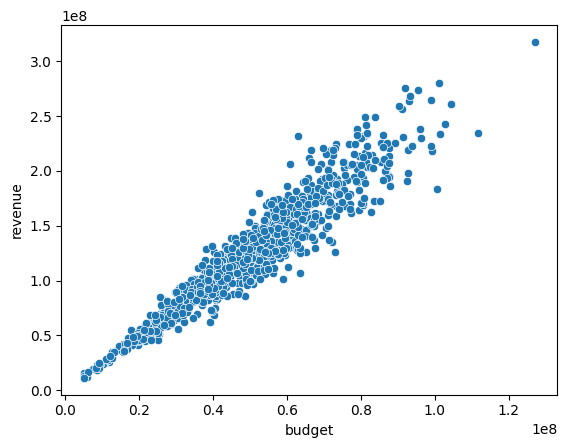

In [ ]:
# Part 2: Exploratory Data Analysis
# Summary statistics
# Use .describe() to summarize budget, runtime, and revenue
print(df[['runtime','budget','revenue']].describe())
print('-----------------------------------------------------------------')
# Scatter plot
# Plot budget vs revenue
sns.scatterplot(data=df,x='budget',y='revenue')
# Correlation
# Check correlation between budget, runtime, and revenue
print(df[['runtime','budget','revenue']].corr())
print('-------------------------------------------------------')

In [ ]:
# Part 3: Linear Regression Model
# Select features and target
# Features: budget
X=df[['budget']]
# Target: revenue
y=df['revenue']
# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
# Build and train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Evaluate the model
print(f"Slope: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Equation: y={model.coef_}* X + {model.intercept_}")

Slope: [2.49453786]
Intercept: 307809.877760604
Equation: y=[2.49453786]* X + 307809.877760604


In [ ]:
#predict
y_pred=model.predict(X_test)

In [ ]:
print(y_pred.shape)
print(y_train.shape)
print(y_test.shape)

mse=mean_squared_error(y_test,y_pred)
print(f"Mean Square Error: {mse}")

r2=r2_score(y_test,y_pred)
print(f"r2: {r2}")

(186,)
(744,)
(186,)
Mean Square Error: 310822555366898.3
r2: 0.8888266134985646


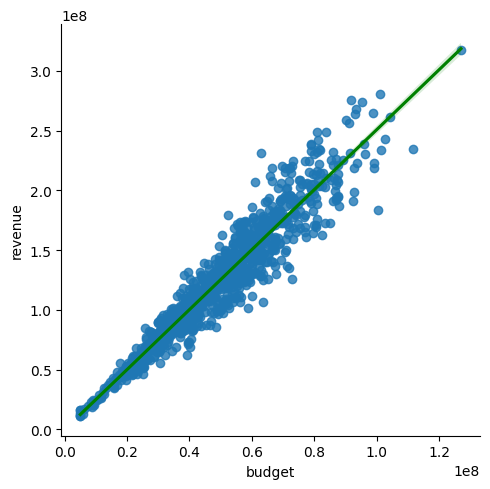

In [ ]:
# Plot regression line
sns.lmplot(data=df,x='budget',y='revenue',line_kws={'color': 'green'})

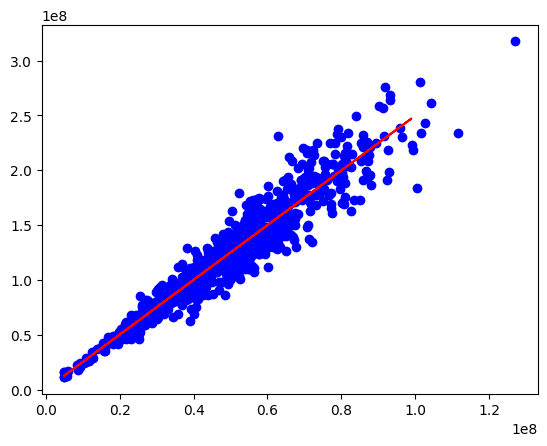

In [ ]:
#plot with matplotmib
# | What you want to show            | What to use                                     |
# | -------------------------------- | ----------------------------------------------- |
# | Training data (actual points)    | `plt.scatter(x_train, y_train)`                 |
# | Prediction line on test data     | `plt.plot(x_test, y_predict)`                   |
# | Compare predicted vs actual test | Add `plt.scatter(x_test, y_test)` and line plot |

plt.scatter(X_train,y_train,color='blue')
plt.plot(X_test,y_pred,color="red")
plt.show()